# **Chapter 25**  
**┗ 심장 질병 예측**
---
> **목차(Context)**

* 문제상황 및 데이터 살펴보기
* 문제해결 프로세스 정의
* 🥉Session 1 - 「심장 질병 Summary」
* 🥈Session 2 - 「심장 질병 영향 인자 탐색」
* 🥇Session 3 - 「ML 활용 심장 질병 예측」

In [ ]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/part3_lecture_fastcampus/chapter25')
# '/content/drive/MyDrive/Colab Notebooks/ ← 여기 경로까지는 본인의 경로 입력, part3_lecture_fastcampus/chapter25' ← 변경X
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Colab Notebooks/part3_lecture_fastcampus/chapter25'

## **문제상황 및 데이터 살펴보기**
---
> **시나리오** 🧑💗 (의료업 종사자)

```
A병원은 매출 상승을 위해 고객 Care 관점에서 건광관리 운영프로그램을 기획 중이다. 특히 생명과도 직결될 수 있는 심장질환에  
대한 위험도가 높은 고객 대상으로 운영하려고 한다. 환자들의 개인 프로필 정보와 건강 데이터를 활용하여 심장질환에 대한 위험도를 측정하고  
이를 기반으로 고객 선정과 함께 건강관리 운영프로램을 운영할 계획이다.
```  

> **데이터 살펴보기**

* 환자 개인 프로필 데이터
* 데이터 명세 ⬇

|HeartDiseaseorAttack|HighBP|HighChol|CholCheck|BMI|Smoker|
|:---:|:---:|:---:|:---:|:---:|:---:|
|심장질환여부|고혈압|혈중콜레스트롤|최근5년이내 콜레스트롤 검사여부|체질량지수|흡연여부|
|Stroke|Diabetes|PhysActivity|Fruits|Veggies|HvyAlcoholConsump|
|뇌졸중여부|당뇨병여부|30일이내운동여부|하루1회 과일섭취 여부|하루1회 채소섭취 여부|과음 여부|
|MentHlth|PhysHlth|DiffWalk|AnyHealthcare|NoDocbcCost|GenHlth|
|최근 30일 스트레스 일수|최근 30일 신체건강 나쁨 일수|계단/걸음 문제|건강보험여부|12개월내 병원방문이 필요하나 방문N(비용문제)|일반적 건강상태|
|Sex|Age|Education|Income|
|성별|연령|교욱수준|소득수준|


In [ ]:
# ▶ Data read
import pandas as pd 
df = pd.read_csv('chapter25_heart_disease.csv')
df.head(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0



## **문제해결 프로세스 정의**
---
> **문제정의**

```
▶ 매출 감소로 인한 새로운 서비스 기획 및 운영 필요
```  

> **기대효과**

```
▶ 심장질환 관리 프로그램 운영을 위한 고객 선정 (매출상승), 고객만족도 증가
```

> **해결방안**

```
▶ 심장질환 가능성이 높은 고객을 예측 및 선정하여 관리 프로그램 운영
▶ Session 1 🥉
 - Data 전처리 및 질환 데이터 탐색 
▶ Session 2 🥈
 - Heat map 분석을 통해 상관관계 높은 데이터 추출 및 상세 분석
▶ Session 3 🥇
 - ML 알고리즘을 활용하여 심장 질환 발생 환자 예측
```

> **성과측정**  

```
▶ 고객 설문 조사 만족도 및 매출 증가 효과 모니터링
```

> **현업적용**  

```
▶ Model에 Input하기 위한 Data mart 생성
▶ 예측 모델 활용 고객군 추출 및 선정
▶ 선정된 고객 대상 건강관리 운영프로그램 수행
```

> **주요 코드 미리 살펴보기**  

```
▶ session 1 → catplot, groupby.agg(), df.style.background_gradient(cmap='')
▶ session 2 → sns.heatmap(), df.corr()
▶ session 3 → RandomForestClassifier(), LabelEncoder(), roc_auc_score, roc_curve
```

## **🥉Session 1**  
**┗ 심장 질병 Summary**  
---

### · Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인 

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  


In [ ]:
# ▶ Data 형태 확인
# ▶ 253,680 row, 22 col로 구성됨
print('df', df.shape)

df (253680, 22)


In [ ]:
# ▶ Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
# ▶ Null 값 확인
print(df.isnull().sum())

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [ ]:
# ▶ Outlier 확인
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### · 데이터 탐색
---

In [ ]:
df.head(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df['HeartDiseaseorAttack'].value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

In [ ]:
# ▶ 심장질환 발병률 약 10% 
23893 / (23893 + 229787)

0.09418558814254178

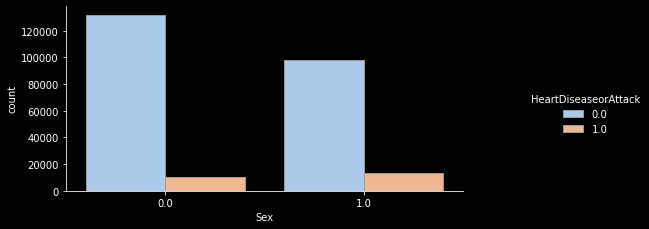

In [ ]:
# ▶ 성별에 따른 심장질환 발병률 비교

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

sns.catplot(x="Sex", kind="count", hue="HeartDiseaseorAttack",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)

In [ ]:
# ▶ 성별에 따른 심장질환 발병률 비교
df_gp = df.groupby('Sex')['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
Sex,,,
1.0,111706,13688.0,12.3
0.0,141974,10205.0,7.2


In [ ]:
# ▶ 시각적 표현 Tip
pd.DataFrame(df_gp['ratio']).style.background_gradient(cmap='Reds')

,ratio
Sex,
1.0,12.300000
0.0,7.200000


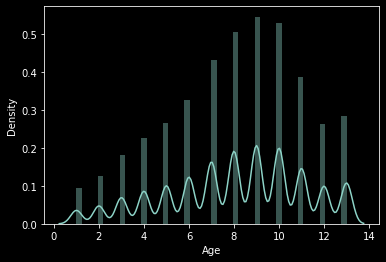

In [ ]:
# ▶ 연령에 따른 심장질환 발병률 비교
sns.distplot(df['Age']);

In [ ]:
# ▶ 연령에 따른 심장질환 발병률 비교
import numpy as np
df['Age_gp'] = np.where (df['Age'] <= 4, '4세이하', 
                           np.where(df['Age'] <= 10, '4-10세 이하', '10세 초과'))

df[['Age','Age_gp']]

,Age,Age_gp
0,9.0,4-10세 이하
1,7.0,4-10세 이하
2,9.0,4-10세 이하
3,11.0,10세 초과
4,11.0,10세 초과
...,...,...
253675,5.0,4-10세 이하
253676,11.0,10세 초과
253677,2.0,4세이하
253678,7.0,4-10세 이하


In [ ]:
# ▶ 연령에 따른 심장질환 발병률 비교
df_gp = df.groupby('Age_gp')['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
Age_gp,,,
10세 초과,56876,11199.0,19.7
4-10세 이하,158560,12292.0,7.8
4세이하,38244,402.0,1.1


In [ ]:
# ▶ 시각적 표현 Tip
df_gp_ratio = df_gp[['ratio']]
df_gp_ratio.style.background_gradient(cmap='Reds')

,ratio
Age_gp,
10세 초과,19.700000
4-10세 이하,7.800000
4세이하,1.100000


## **🥈Session 2**  
**┗ 심장 질병 영향 인자 탐색**  
---

### · Heatmap 분석  
---

In [ ]:
df.head(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Age_gp
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,4-10세 이하
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,4-10세 이하
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,4-10세 이하
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,10세 초과
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,10세 초과


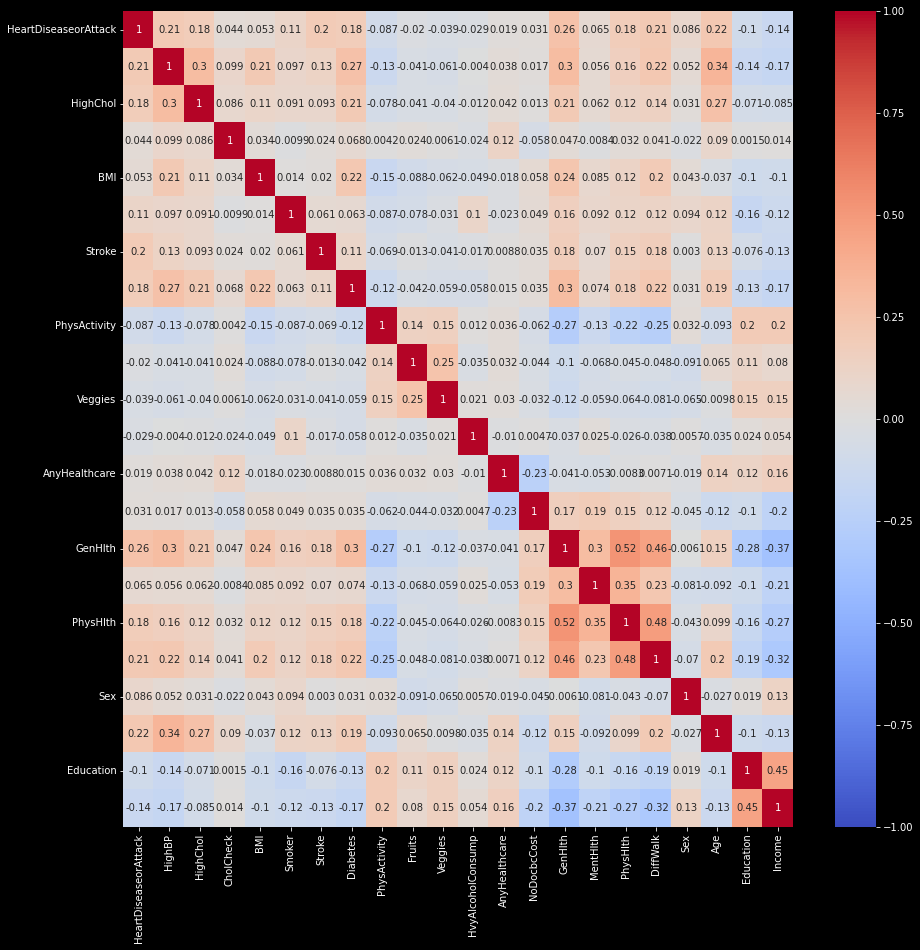

In [ ]:
# ▶ 모든 변수가 Numeric 변수이기 때문에 Corr heatmap을 통해서 전체적인 Summary
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');
plt.gcf().set_size_inches(15   , 15)

In [ ]:
# ▶ corr 만 가져와서 탐색 시작, 심장질환과의 상관계수만 확인할 것이니, 첫 col만 가져옴
df_corr = pd.DataFrame(df.corr().iloc[:,0])
df_corr = df_corr.iloc[1:,:]
df_corr.columns = ['corr']
df_corr

,corr
HighBP,0.209361
HighChol,0.180765
CholCheck,0.044206
BMI,0.052904
Smoker,0.114441
Stroke,0.203002
Diabetes,0.180272
PhysActivity,-0.087299
Fruits,-0.019790
Veggies,-0.039167


In [ ]:
# ▶ corr 만 가져와서 탐색 시작 (※ 상관계수 0.2이상)
df_corr [ abs(df_corr['corr']) > 0.2 ]

,corr
HighBP,0.209361
Stroke,0.203002
GenHlth,0.258383
DiffWalk,0.212709
Age,0.221618


### · 중요변수 탐색 
---

         count      sum  ratio
HighBP                        
0.0     144851   5965.0    4.1
1.0     108829  17928.0   16.5


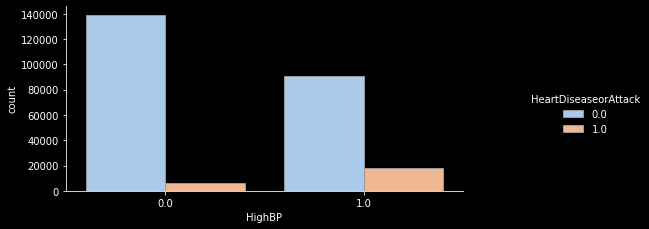

In [ ]:
# ▶ HighBP(고혈압)
sns.catplot(x="HighBP", hue="HeartDiseaseorAttack", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby('HighBP')['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
print(df_gp)

         count      sum  ratio
Stroke                        
0.0     243388  19956.0    8.2
1.0      10292   3937.0   38.3


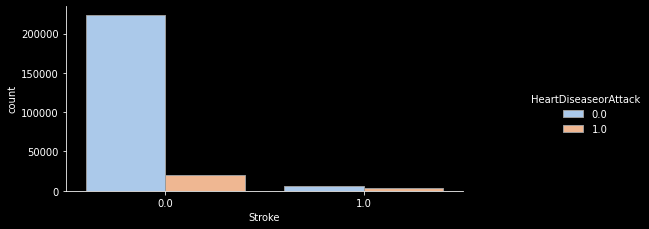

In [ ]:
# ▶ Stroke(뇌졸증 여부)
sns.catplot(x="Stroke", hue="HeartDiseaseorAttack", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby('Stroke')['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
print(df_gp)

         count     sum  ratio
GenHlth                      
1.0      45299  1016.0    2.2
2.0      89084  4128.0    4.6
3.0      75646  7914.0   10.5
4.0      31570  6728.0   21.3
5.0      12081  4107.0   34.0


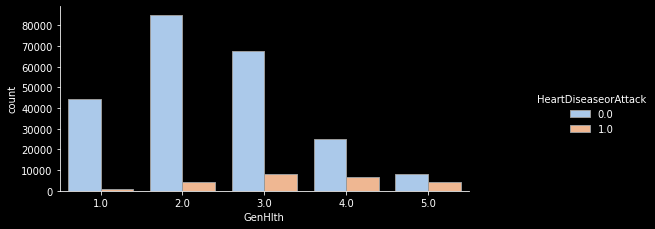

In [ ]:
# ▶ GenHlth(일반적 건강상태)
sns.catplot(x="GenHlth", hue="HeartDiseaseorAttack", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby('GenHlth')['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
print(df_gp)

           count      sum  ratio
DiffWalk                        
0.0       211005  13978.0    6.6
1.0        42675   9915.0   23.2


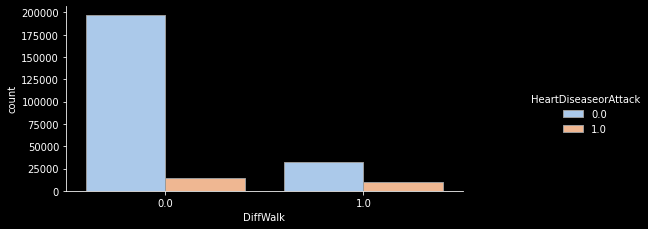

In [ ]:
# ▶ DiffWalk(계단/걸음 문제)
val = 'DiffWalk'

sns.catplot(x=val, hue="HeartDiseaseorAttack", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby(val)['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
print(df_gp)

      count     sum  ratio
Age                       
1.0    5700    29.0    0.5
2.0    7598    54.0    0.7
3.0   11123   126.0    1.1
4.0   13823   193.0    1.4
5.0   16157   351.0    2.2
6.0   19819   712.0    3.6
7.0   26314  1425.0    5.4
8.0   30832  2253.0    7.3
9.0   33244  3358.0   10.1
10.0  32194  4193.0   13.0
11.0  23533  3947.0   16.8
12.0  15980  3093.0   19.4
13.0  17363  4159.0   24.0


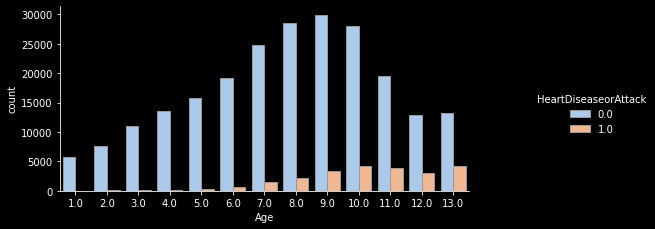

In [ ]:
# ▶ Age(나이)
sns.catplot(x="Age", hue="HeartDiseaseorAttack", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby('Age')['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
print(df_gp)

## **🥇Session 3**  
**┗ ML 활용 심장 질병 예측**  
---

### · 모델링을 위한 데이터 준비
---
* 모델링을 수행하기 위해 Feature와 예측하고자하는 값인 Y로 데이터를 나눔
* 학습과 예측을 위한 Train / Test set 분할

In [ ]:
df.head(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Age_gp
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,4-10세 이하
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,4-10세 이하
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,4-10세 이하
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,10세 초과
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,10세 초과


In [ ]:
# ▶ 모델링을 학습하기 위한 Fearue(X)와 Y데이터를 구분하는 단계
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['HeartDiseaseorAttack', 'Age_gp'], axis=1)
Y=df['HeartDiseaseorAttack']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(177576, 21)
(177576,)
(76104, 21)
(76104,)


In [ ]:
# ▶ stratify='Y' 옵션 결과 확인
pd.Series(y_train).value_counts()

0.0    160851
1.0     16725
Name: HeartDiseaseorAttack, dtype: int64

In [ ]:
16725/(160851+16725)

0.09418502500337883

In [ ]:
# ▶ stratify='Y' 옵션 결과 확인
pd.Series(y_test).value_counts()

0.0    68936
1.0     7168
Name: HeartDiseaseorAttack, dtype: int64

In [ ]:
7168/(68936+7168)

0.094186902133922

### · 모델 학습 및 평가
---
* 모델을 학습하고 예측을 수행하여 성능을 평가

In [ ]:
from sklearn.metrics import classification_report
# ▶ 학습
rfc = RandomForestClassifier(random_state = 123456, max_depth=6)
rfc.fit(x_train, y_train)

# ▶ 예측
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95    160851
         1.0       0.76      0.02      0.04     16725

    accuracy                           0.91    177576
   macro avg       0.83      0.51      0.50    177576
weighted avg       0.89      0.91      0.87    177576

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     68936
         1.0       0.74      0.02      0.04      7168

    accuracy                           0.91     76104
   macro avg       0.83      0.51      0.49     76104
weighted avg       0.89      0.91      0.86     76104



In [ ]:
pd.Series(y_pred_train).value_counts()

0.0    177129
1.0       447
dtype: int64

In [ ]:
# ▶ Q. [Test] Precision = 0.60, threshold = ? ↓(base:0.5), Recall = ?
pd.Series(y_pred_test).value_counts()

0.0    75925
1.0      179
dtype: int64

In [ ]:
from sklearn.preprocessing import Binarizer

# ▶ threshold를 증가시키면, 진짜 정답일 데이터를 예측할 것이므로 precision 값이 증가 (※ 예측하는 개수 감소)
# ▶ threshold를 감소시키면, 조금 이라도 가능성이 있는 정답을 더 많이 예측하므로 recall 값이 증가 (※ 예측하는 개수 증가)
Input_threshold = 0.405

pred_proba_test = rfc.predict_proba(x_test)[:,1].reshape(-1,1)
custom_predict = Binarizer(threshold=Input_threshold).fit_transform(pred_proba_test)

# ▶ 성능평가 확인
print(classification_report(y_test, custom_predict))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     68936
         1.0       0.60      0.07      0.12      7168

    accuracy                           0.91     76104
   macro avg       0.76      0.53      0.54     76104
weighted avg       0.88      0.91      0.87     76104



In [ ]:
pd.Series(custom_predict.reshape(-1)).value_counts()

0.0    75308
1.0      796
dtype: int64

In [ ]:
# ▶ 과적합 문제, Train과 Test set에 성능을 최대한 줄여주는 것이 과적합을 방지
from sklearn.metrics import roc_auc_score

y_pred_train_proba = rfc.predict_proba(x_train)[:, 1] 
y_pred_test_proba = rfc.predict_proba(x_test)[:, 1] 


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.8430654326508655
roc_score_test : 0.8409566886703401


In [ ]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')
  
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

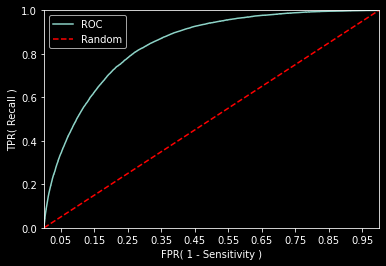

In [ ]:
roc_curve_plot(y_train, y_pred_train_proba)

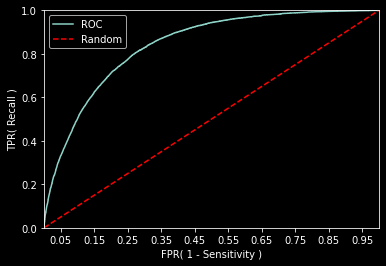

In [ ]:
roc_curve_plot(y_test, y_pred_test_proba)

### · 중요 변수 파악
---
* Feature IMP 분석을 통한 중요변수 파악


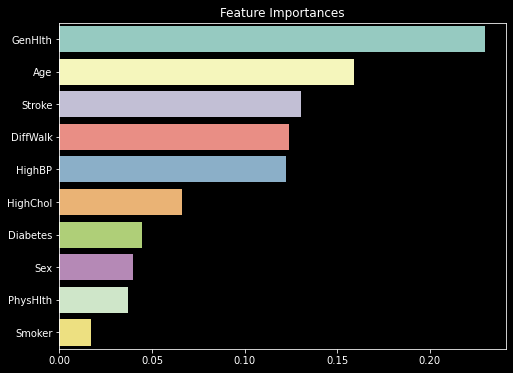

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfc.feature_importances_ # light GBM : feature_importances()
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
# plt.rc('xtick', labelsize=5)
plt.show()

         count     sum  ratio
GenHlth                      
1.0      45299  1016.0    2.2
2.0      89084  4128.0    4.6
3.0      75646  7914.0   10.5
4.0      31570  6728.0   21.3
5.0      12081  4107.0   34.0


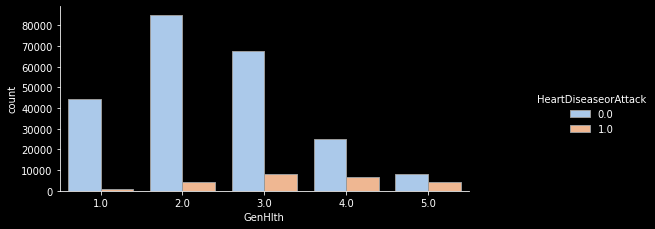

In [ ]:
# ▶ 후보 1위 변수 탐색
# ▶ GenHlth(일반적 건강상태)
sns.catplot(x="GenHlth", hue="HeartDiseaseorAttack", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby('GenHlth')['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
print(df_gp)

           count      sum  ratio
HighChol                        
0.0       146089   7140.0    4.9
1.0       107591  16753.0   15.6


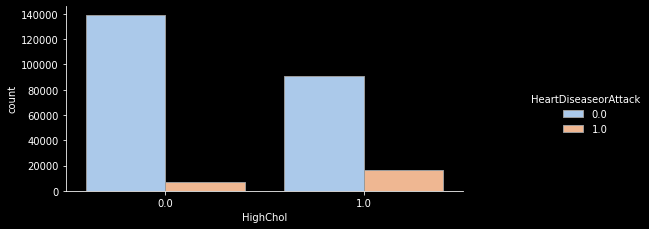

In [ ]:
# ▶ HighChol(콜레스트롤 여부)
sns.catplot(x="HighChol", hue="HeartDiseaseorAttack", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby('HighChol')['HeartDiseaseorAttack'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
print(df_gp)


### · 모델 Save and Read
---
* 최종 모델을 저장 및 다시 불러오기

In [ ]:
import pickle
# 모델 저장
saved_model = pickle.dumps(rfc)

# 모델 Read
clf_from_pickle = pickle.loads(saved_model)

# 데이터 저장 
df.to_csv("custoemr_list.csv")